https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv

Target feature = Price 
Categorical features  
Continuous features 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.graphics.tsaplots as smgt
from statsmodels.stats import stattools
from sklearn.preprocessing import StandardScaler,Normalizer,LabelEncoder,PolynomialFeatures,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV,StratifiedKFold,learning_curve,KFold,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel, RFE,SelectPercentile,f_regression,VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#specify for time series analysis 
from datetime import date, timedelta, datetime

In [2]:
df= pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
#Continuous features 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Missing values 

In [6]:
#simplificity, missing values > 40% of the dataset, remove them. Imputing them with mean, mode, median might impose a data skewness
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
df.dropna(inplace= True)

In [8]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtit

Data Transformation

In [10]:
# reorder and select columns related
df_ts = df[['Date','Price']]

# Show top results
df_ts.head(5)

,Date,Price
2,4/02/2016,1035000.0
4,4/03/2017,1465000.0
6,4/06/2016,1600000.0
11,7/05/2016,1876000.0
14,8/10/2016,1636000.0


In [11]:
# Convert the Strings to Datetime and remove time in the DataFrame
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

# Remove day from timestamp
df_ts['Date'] = df_ts['Date'].dt.strftime('%Y-%m')

# Sort a pandas dataframe based on DateTime field
df_ts = df_ts.sort_values(by='Date',ascending=True)

# Show top results
df_ts.head(30)

,Date,Price
4940,2016-03,630000.0
1010,2016-03,1315000.0
5179,2016-03,1650000.0
5181,2016-03,2670000.0
5185,2016-03,348000.0
5189,2016-03,1189000.0
10990,2016-03,380000.0
5364,2016-03,815000.0
5436,2016-03,691000.0
5437,2016-03,560000.0


In [12]:
# Copy dataframe for ML model
df_ml = df_ts.copy()

In [13]:
import math

# Group by 'Date' and calculate the average price
average_prices = df_ts.groupby('Date')['Price'].mean()

# Print the resulting Series
print(average_prices)

Date
2016-03    1.214349e+06
2016-04    1.034289e+06
2016-05    1.066096e+06
2016-06    1.032916e+06
2016-07    9.937646e+05
2016-08    1.083825e+06
2016-09    1.048672e+06
2016-10    1.188132e+06
2016-11    1.263208e+06
2016-12    1.147341e+06
2017-01    8.614342e+05
2017-02    1.175492e+06
2017-03    1.098635e+06
2017-04    1.034092e+06
2017-05    1.102508e+06
2017-06    1.090207e+06
2017-07    8.677642e+05
2017-08    1.023864e+06
2017-09    1.154065e+06
2017-10    1.214018e+06
2017-11    1.170529e+06
2017-12    1.183031e+06
2018-01    7.562222e+05
2018-02    1.166444e+06
2018-03    1.222821e+06
2018-06    9.688785e+05
2018-10    8.305281e+05
Name: Price, dtype: float64


In [14]:
df_ts_1 = pd.DataFrame(average_prices)
df_ts_1['Price'] = df_ts_1['Price'].round(1) 
df_ts_1

,Price
Date,
2016-03,1214348.8
2016-04,1034289.1
2016-05,1066095.8
2016-06,1032915.7
2016-07,993764.6
2016-08,1083824.5
2016-09,1048672.0
2016-10,1188131.8
2016-11,1263208.3


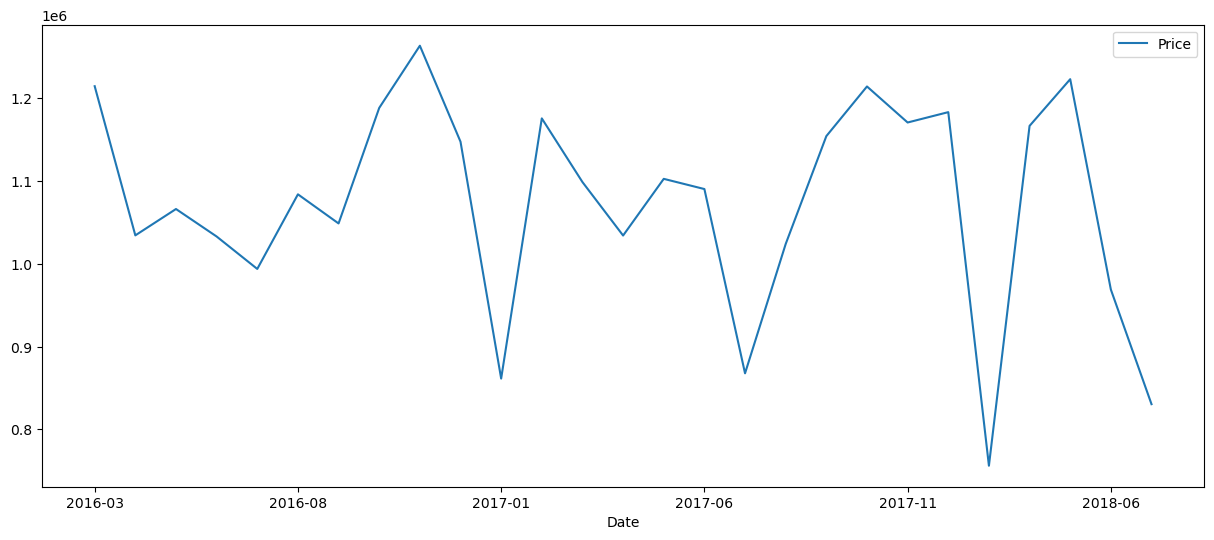

In [15]:
df_ts_1.plot(figsize=(15, 6))
plt.show()

Time Series analysis and Forecasting with ARIMA

In [16]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

In [17]:
check_stationarity(df_ts_1.Price)

The test statistic: -2.571819
p-value: 0.098963
Critical Values:
1%: -3.889
5%: -3.054
10%: -2.667


Differring 

In [18]:
import numpy as np
ts_temp_log = np.log(df_ts_1.Price)
ts_temp_log

Date
2016-03    14.009719
2016-04    13.849225
2016-05    13.879514
2016-06    13.847896
2016-07    13.809256
2016-08    13.896007
2016-09    13.863035
2016-10    13.987893
2016-11    14.049165
2016-12    13.952958
2017-01    13.666354
2017-02    13.977197
2017-03    13.909580
2017-04    13.849035
2017-05    13.913098
2017-06    13.901879
2017-07    13.673675
2017-08    13.839095
2017-09    13.958801
2017-10    14.009446
2017-11    13.972967
2017-12    13.983590
2018-01    13.536091
2018-02    13.969470
2018-03    14.016671
2018-06    13.783894
2018-10    13.629817
Name: Price, dtype: float64

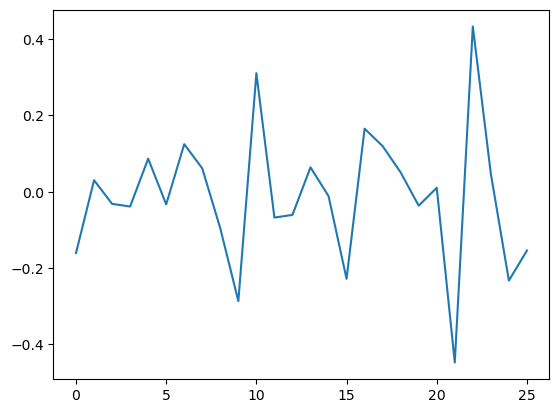

In [19]:
ts_temp_log_diff = np.diff(ts_temp_log)

plt.plot(ts_temp_log_diff)

In [20]:
check_stationarity(ts_temp_log_diff)

The test statistic: -4.909841
p-value: 0.000033
Critical Values:
1%: -3.788
5%: -3.013
10%: -2.646


Determine P and Q value from ACF and PACF plot 

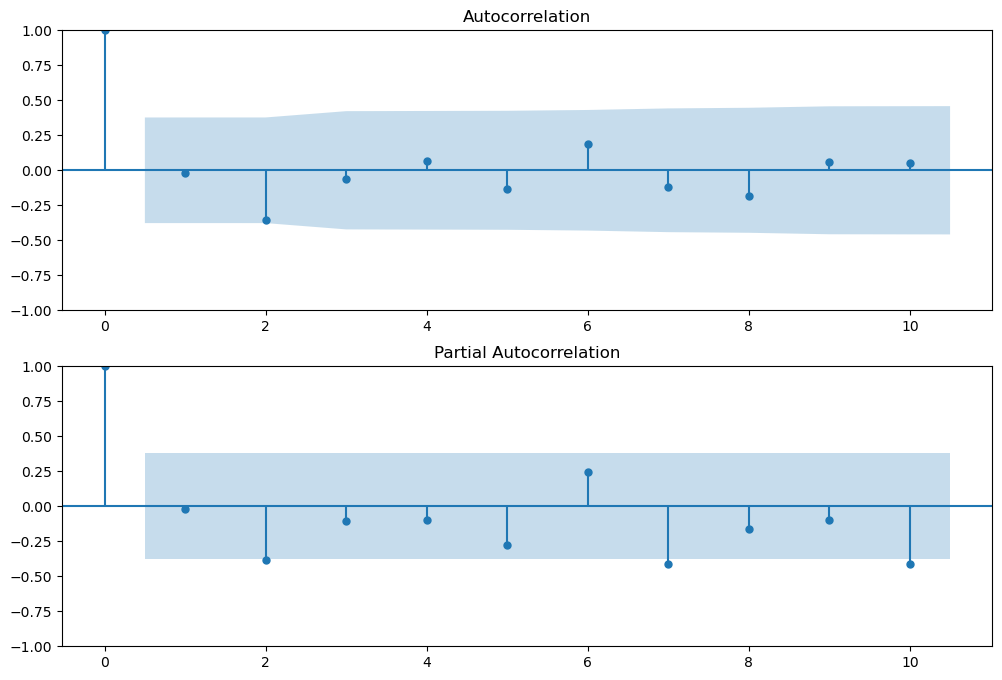

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ts_1.Price,lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ts_1.Price,lags=10,ax=ax2)

In [22]:
import pmdarima as pm
auto_sarimax_fit = pm.auto_arima(df_ts_1.Price, 
                                start_P=1,
                       start_q=1,
                       max_p=3,
                       max_q=3,
                       m=12,
                       seasonal=True,
                       d=None,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=403.148, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=391.929, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=394.978, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=394.865, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=394.469, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=393.849, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=393.853, Time=0.06 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=395.667, Time=0.19 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=393.128, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=393.674, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=395.621, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.167 seconds


In [23]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_ts_1.Price,order=(0, 0, 0),
              seasonal_order=(0, 1, 0, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:                    Price   No. Observations:                   27
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -182.950
Date:                  Sun, 02 Jul 2023   AIC                            367.899
Time:                          20:55:30   BIC                            368.538
Sample:                               0   HQIC                           367.840
                                   - 27                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.071e+09   1.04e+09      5.833      0.000    4.03e+09    8.11e+09
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.31
Prob(Q):                       

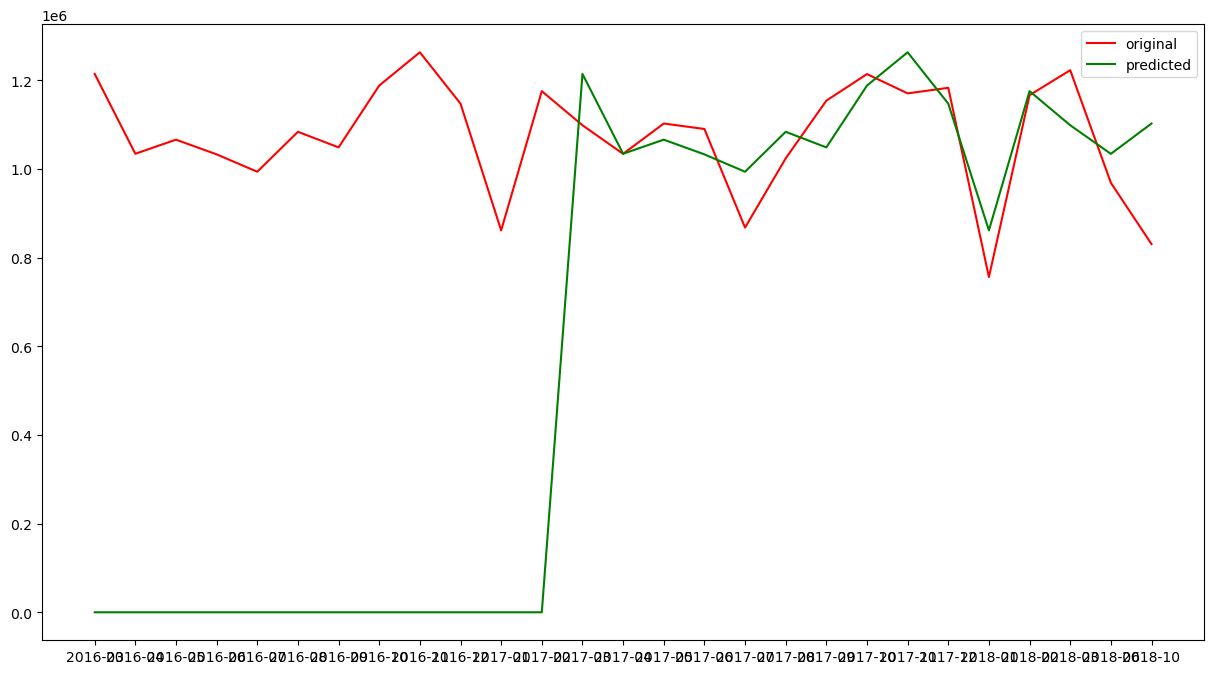

In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(15,8))
plt.plot(df_ts_1.Price[:],label = 'original', color='r' )
plt.plot(results.predict(),label = 'predicted', color='g' )

plt.legend()

In [28]:
forecast = results.predict(start = len(df_ts_1),
                           end=len(df_ts_1)+10,
                           typ='levels').rename('data sarimax (0,1,0) forecast')

<Axes: xlabel='Date'>

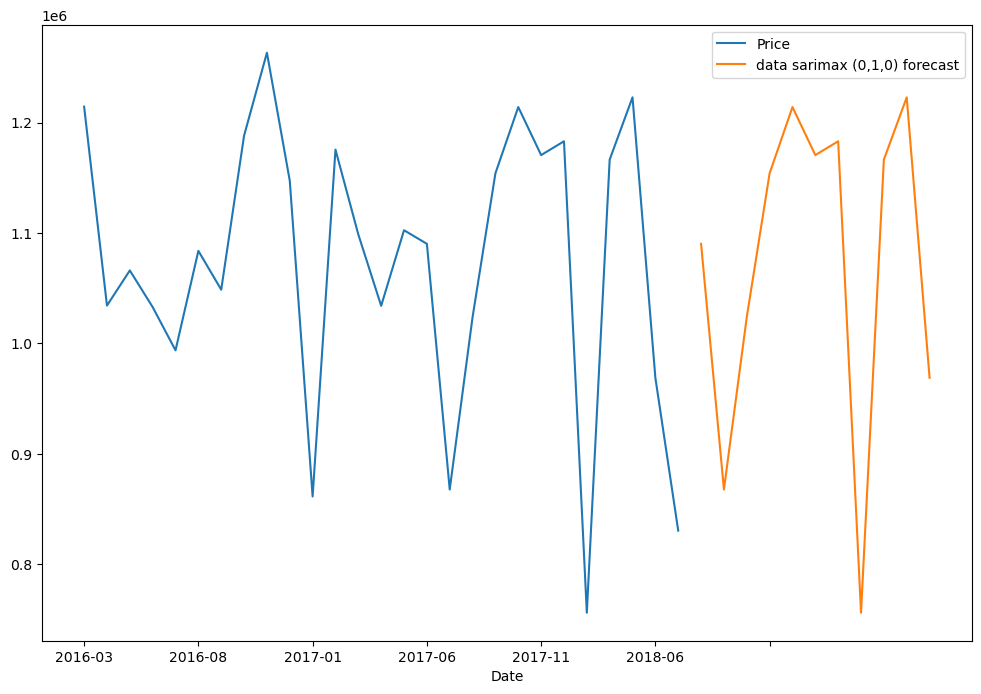

In [29]:
df_ts_1.Price.plot(figsize=(12,8),legend=True)
forecast.plot(legend=True)

In [30]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse=rmse(df_ts_1.Price, results.predict())
print(rmse) 

# Calculate mean squared error
mse = mean_squared_error(df_ts_1.Price, results.predict())
print(mse)

735887.8032939371
541530859036.7763


Conclusion

Here are the key points that we discussed about time series modelling with ARIMA:

- Time Series Data Visualization is an important step to understand for analysis & forecasting and finding out the patterns in data.
- Dickey-Fuller test performed to determine if the data is stationary or not. It’s necessary to check the stationarity before fitting the data to ARIMA.
- Decomposition helps to remove the seasonality from the data and three components of decomposition are Trend, Seasonality and Residual.
- Data differencing helps to remove stationarity from data and to determine the value of d.
- Plot Auto-Correlation(ACF) and Partial Auto-Correlation (PACF) graph to determine the value of p and q.
- Auto Arima package used to determine the value of p,q and d by evaluating the value of Akaike’s Information Criterion (AIC).
- Residual diagnosis is an important step post fitting the ARIMA model to evaluate if forecasting can be done with the fitted model or not.
- Residual property of ARIMAResult object used for the Residual Analysis. If the residual is a white noise then we are good and ready for forecasting.
- Cross validation and RMSE (Root Mean Square Error) calculated using the Predict function.
- Out of sample forecast calculated using the Forecast function and gives forecast interval too.
